In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
hr_df = pd.read_csv('hr_analytics.csv', encoding='ascii')

hr_df.head()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,20-Sep-19,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,...,1,2,3,15-Jul-23,Leadership Development,Internal,Failed,2,606.11,50
1,3428,11-Feb-23,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,...,2,1,5,12-Sep-22,Customer Service,External,Incomplete,4,673.02,58
2,3429,10-Dec-18,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,...,1,2,1,13-Aug-22,Leadership Development,External,Failed,2,413.28,27
3,3430,21-Jun-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,...,5,5,4,15-Dec-22,Project Management,External,Completed,3,663.78,23
4,3431,29-Jun-19,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,...,2,5,3,13-Jul-23,Technical Skills,External,Failed,5,399.03,50


In [4]:
# Check the shape of the dataframe and data types
print("Dataset shape:", hr_df.shape)
print("\nData types:")
print(hr_df.dtypes)

Dataset shape: (2845, 28)

Data types:
Employee ID                     int64
StartDate                      object
Title                          object
BusinessUnit                   object
EmployeeStatus                 object
EmployeeType                   object
PayZone                        object
EmployeeClassificationType     object
DepartmentType                 object
Division                       object
DOB                            object
State                          object
GenderCode                     object
RaceDesc                       object
MaritalDesc                    object
Performance Score              object
Current Employee Rating         int64
Survey Date                    object
Engagement Score                int64
Satisfaction Score              int64
Work-Life Balance Score         int64
Training Date                  object
Training Program Name          object
Training Type                  object
Training Outcome               object
Training Du

In [5]:
# Check for missing values
print("\n Missing values:")
print(hr_df.isnull().sum())


 Missing values:
Employee ID                   0
StartDate                     0
Title                         0
BusinessUnit                  0
EmployeeStatus                0
EmployeeType                  0
PayZone                       0
EmployeeClassificationType    0
DepartmentType                0
Division                      0
DOB                           0
State                         0
GenderCode                    0
RaceDesc                      0
MaritalDesc                   0
Performance Score             0
Current Employee Rating       0
Survey Date                   0
Engagement Score              0
Satisfaction Score            0
Work-Life Balance Score       0
Training Date                 0
Training Program Name         0
Training Type                 0
Training Outcome              0
Training Duration(Days)       0
Training Cost                 0
Age                           0
dtype: int64


In [7]:
# Get basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
hr_df.describe()


Basic statistics for numerical columns:


,Employee ID,Current Employee Rating,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Duration(Days),Training Cost,Age
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,2470.591916,2.974692,2.941652,3.028471,2.989104,2.973989,559.278956,49.448506
std,859.450107,1.012610,1.435230,1.410067,1.408816,1.419682,263.333611,17.689179
min,1001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.040000,17.000000
25%,1736.000000,2.000000,2.000000,2.000000,2.000000,2.000000,328.060000,34.000000
50%,2456.000000,3.000000,3.000000,3.000000,3.000000,3.000000,571.810000,49.000000
75%,3197.000000,3.000000,4.000000,4.000000,4.000000,4.000000,788.330000,65.000000
max,4000.000000,5.000000,5.000000,5.000000,5.000000,5.000000,999.970000,82.000000


In [9]:
# Check to see if an employee is still with the company
print("EmployeeStatus unique values:")
print(hr_df["EmployeeStatus"].unique())

# Check to see if there are any columns related to retention or turnover
print("\nAll columns in the dataset:")
print(hr_df.columns.tolist())

EmployeeStatus unique values:
['Active' 'Terminated']

All columns in the dataset:
['Employee ID', 'StartDate', 'Title', 'BusinessUnit', 'EmployeeStatus', 'EmployeeType', 'PayZone', 'EmployeeClassificationType', 'DepartmentType', 'Division', 'DOB', 'State', 'GenderCode', 'RaceDesc', 'MaritalDesc', 'Performance Score', 'Current Employee Rating', 'Survey Date', 'Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score', 'Training Date', 'Training Program Name', 'Training Type', 'Training Outcome', 'Training Duration(Days)', 'Training Cost', 'Age']


In [10]:
# Calculate retention rate
retention_rate = hr_df["EmployeeStatus"].value_counts(normalize=True) * 100
print("Employee Retention Rate:")
print(retention_rate)

Employee Retention Rate:
EmployeeStatus
Active        86.397188
Terminated    13.602812
Name: proportion, dtype: float64


In [11]:
from datetime import datetime

In [13]:
hr_df["StartDate"] = pd.to_datetime(hr_df["StartDate"], format="%d-%b-%y", errors="coerce")
hr_df["DOB"] = pd.to_datetime(hr_df["DOB"], format="%d-%m-%y", errors="coerce")
hr_df['Survey Date'] = pd.to_datetime(hr_df['Survey Date'], format='%d-%m-%Y', errors='coerce')
hr_df['Training Date'] = pd.to_datetime(hr_df['Training Date'], format='%d-%b-%y', errors='coerce')

In [14]:
# Check training columns outcomes distribution
print("\nTraining Outcome Distribution:")
print(hr_df["Training Outcome"].value_counts(normalize=True) * 100)


Training Outcome Distribution:
Training Outcome
Completed     25.905097
Incomplete    25.694200
Passed        24.920914
Failed        23.479789
Name: proportion, dtype: float64


In [17]:
# Check engagment satisfaction, and work - life balance scores
print("\nEngagement Score Distribution:")
print(hr_df["Engagement Score"].value_counts(normalize=True) * 100)

print("\nSatisfaction Score Distribution:")
print(hr_df["Satisfaction Score"].value_counts(normalize=True) * 100)

print("\n Work-Life Balance Score Distribution:")
print(hr_df['Work-Life Balance Score'].value_counts(normalize=True) * 100


Engagement Score Distribution:
Engagement Score
1    22.073814
2    20.246046
5    19.578207
4    19.402460
3    18.699473
Name: proportion, dtype: float64

Satisfaction Score Distribution:
Satisfaction Score
4    21.511424
3    20.000000
5    19.859402
1    19.753954
2    18.875220
Name: proportion, dtype: float64

 Work-Life Balance Score Distribution:
Work-Life Balance Score
3    21.054482
1    20.210896
5    19.613357
4    19.613357
2    19.507909
Name: proportion, dtype: float64


In [20]:
# Analyze the relationship between training outcomes and employee status
training_vs_status = pd.crosstab(hr_df["Training Outcome"], hr_df["EmployeeStatus"], normalize="index") * 100
print("Training Outcome vs Employee Status (%):")
print(training_vs_status)

Training Outcome vs Employee Status (%):
EmployeeStatus       Active  Terminated
Training Outcome                       
Completed         88.195387   11.804613
Failed            87.125749   12.874251
Incomplete        86.456908   13.543092
Passed            83.779972   16.220028


In [28]:
# Analyze average engagment, satisfaction, and work-life balance scores by employee status
engagement_by_status = hr_df.groupby("EmployeeStatus")["Engagement Score"].mean()
satisfaction_by_status = hr_df.groupby("EmployeeStatus")["Satisfaction Score"].sum()
worklife_by_status = hr_df.groupby("EmployeeStatus")["Work-Life Balance Score"].mean()

print("\n Average Score by Empkloyee Status:")
print(engagement_by_status)

print("\nSatisfaction Score:")
print(satisfaction_by_status)

print("\n Work Life Balance Score")
print(worklife_by_status)

# Analyze training program effectiveness
training_program_outcome = pd.crosstab(hr_df["Training Program Name"], hr_df["Training Outcome"], normalize="index") * 100
print("\n Training Program Effectiveness (%):")
print(training_program_outcome)


 Average Score by Empkloyee Status:
EmployeeStatus
Active        2.948332
Terminated    2.899225
Name: Engagement Score, dtype: float64

Satisfaction Score:
EmployeeStatus
Active        7409
Terminated    1207
Name: Satisfaction Score, dtype: int64

 Work Life Balance Score
EmployeeStatus
Active        3.003662
Terminated    2.896641
Name: Work-Life Balance Score, dtype: float64

 Training Program Effectiveness (%):
Training Outcome        Completed     Failed  Incomplete     Passed
Training Program Name                                              
Communication Skills    29.383886  21.484992   24.170616  24.960506
Customer Service        29.259259  23.703704   22.777778  24.259259
Leadership Development  25.183824  22.058824   24.816176  27.941176
Project Management      23.418803  25.811966   26.495726  24.273504
Technical Skills        21.915285  24.493554   30.386740  23.204420


In [29]:
# Continue displaying the training program effectiveness table
print(training_program_outcome)

Training Outcome        Completed     Failed  Incomplete     Passed
Training Program Name                                              
Communication Skills    29.383886  21.484992   24.170616  24.960506
Customer Service        29.259259  23.703704   22.777778  24.259259
Leadership Development  25.183824  22.058824   24.816176  27.941176
Project Management      23.418803  25.811966   26.495726  24.273504
Technical Skills        21.915285  24.493554   30.386740  23.204420


In [30]:
# Analyze demographic factors
# Age groups and retention
hr_df["Age Group"] = pd.cut(hr_df["Age"], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '31-40', '41-50', '51-60', '61-70'])
age_vs_status = pd.crosstab(hr_df["Age Group"], hr_df["EmployeeStatus"], normalize="index")
print("\n Age Group vs Employee Status (%):")
print(age_vs_status)


 Age Group vs Employee Status (%):
EmployeeStatus    Active  Terminated
Age Group                           
20-30           0.877016    0.122984
31-40           0.843267    0.156733
41-50           0.860465    0.139535
51-60           0.858108    0.141892
61-70           0.890244    0.109756


In [31]:
# Business Unit and retention
business_vs_status = pd.crosstab(hr_df["BusinessUnit"], hr_df["EmployeeStatus"], normalize="index") * 100
print("\n Business Unit vs Employee Status (%):")
print(business_vs_status)


 Business Unit vs Employee Status (%):
EmployeeStatus     Active  Terminated
BusinessUnit                         
BPC             84.375000   15.625000
CCDR            87.676056   12.323944
EW              86.879433   13.120567
MSC             84.751773   15.248227
NEL             84.536082   15.463918
PL              86.925795   13.074205
PYZ             87.719298   12.280702
SVG             87.544484   12.455516
TNS             85.512367   14.487633
WBL             88.111888   11.888112


In [32]:
# Department Type and retentio
department_vs_status = pd.crosstab(hr_df["DepartmentType"], hr_df["EmployeeStatus"], normalize="index") * 100
print("\nDepartment Type vs Employee Status (%):")
print(department_vs_status)


Department Type vs Employee Status (%):
EmployeeStatus            Active  Terminated
DepartmentType                              
Admin Offices          98.734177    1.265823
Executive Office      100.000000    0.000000
IT/IS                  91.687042    8.312958
Production             83.141361   16.858639
Sales                  96.784566    3.215434
Software Engineering   82.142857   17.857143


In [37]:
# Analyze the relationship betwen training outcomes and engagement/satisfaction scores
training_engagement = hr_df.groupby("Training Outcome")["Engagement Score"].mean()
training_satisfaction = hr_df.groupby("Training Outcome")["Satisfaction Score"].mean()
training_worklife = hr_df.groupby("Training Outcome")["Work-Life Balance Score"].mean()

print("Average Scores by Training Outcome")
print("\nEngament Scorre:")
print(training_engagement)
print("\
Satisfaction Score:")
print(training_satisfaction)
print("\
Work-Life Balance Score:")

Average Scores by Training Outcome

Engament Scorre:
Training Outcome
Completed     2.952510
Failed        2.962575
Incomplete    2.919289
Passed        2.933709
Name: Engagement Score, dtype: float64
Satisfaction Score:
Training Outcome
Completed     3.093623
Failed        2.992515
Incomplete    3.008208
Passed        3.015515
Name: Satisfaction Score, dtype: float64
Work-Life Balance Score:


In [39]:
# Analyze the relationship between training type and outcomes
training_type_outcome = pd.crosstab(hr_df["Training Type"], hr_df["Training Outcome"], normalize='index') * 100
print("Training Type vs Outcome")
print(training_type_outcome)

Training Type vs Outcome
Training Outcome  Completed     Failed  Incomplete     Passed
Training Type                                                
External          24.157303  24.157303   26.685393  25.000000
Internal          27.656580  22.800844   24.700915  24.841661


In [40]:
# Analyze the relationship between training type and outcomes
training_type_outcome = pd.crosstab(hr_df['Training Type'], hr_df['Training Outcome'], normalize='index') * 100
print("\
Training Type vs Outcome (%):")
print(training_type_outcome)

Training Type vs Outcome (%):
Training Outcome  Completed     Failed  Incomplete     Passed
Training Type                                                
External          24.157303  24.157303   26.685393  25.000000
Internal          27.656580  22.800844   24.700915  24.841661


In [41]:
# Analyze the relationship between employee performance and retention
performance_vs_status = pd.crosstab(hr_df['Performance Score'], hr_df['EmployeeStatus'], normalize='index') * 100
print("\
Performance Score vs Employee Status (%):")
print(performance_vs_status)

# Analyze the relationship between employee rating and retention
rating_vs_status = pd.crosstab(hr_df['Current Employee Rating'], hr_df['EmployeeStatus'], normalize='index') * 100
print("\
Employee Rating vs Employee Status (%):")
print(rating_vs_status)

Performance Score vs Employee Status (%):
EmployeeStatus        Active  Terminated
Performance Score                       
Exceeds            88.439306   11.560694
Fully Meets        86.272768   13.727232
Needs Improvement  87.654321   12.345679
PIP                79.069767   20.930233
Employee Rating vs Employee Status (%):
EmployeeStatus              Active  Terminated
Current Employee Rating                       
1                        91.269841    8.730159
2                        89.855072   10.144928
3                        84.217781   15.782219
4                        86.848635   13.151365
5                        86.718750   13.281250


<Figure size 1000x600 with 0 Axes>

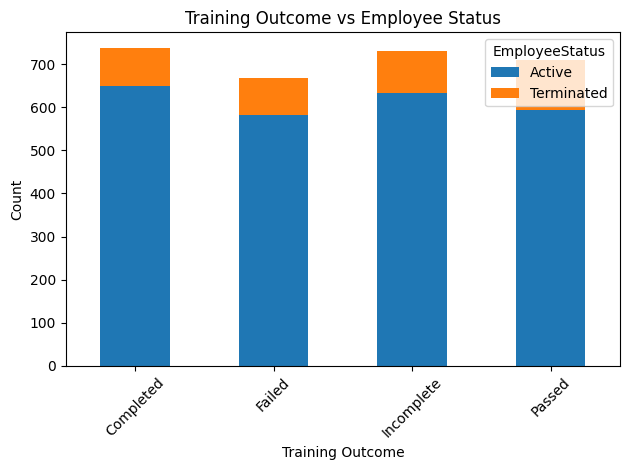

<Figure size 1200x600 with 0 Axes>

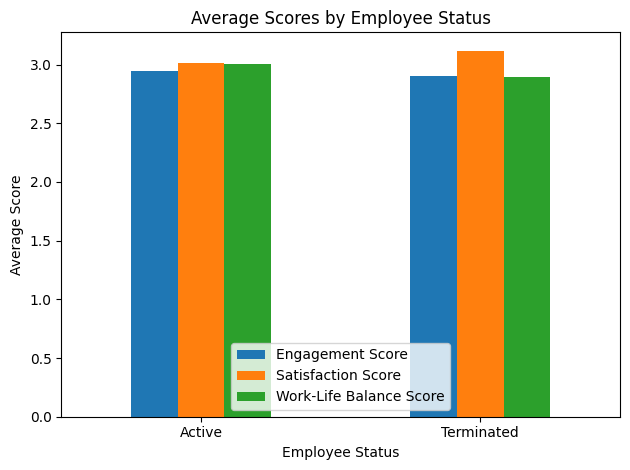

<Figure size 1200x600 with 0 Axes>

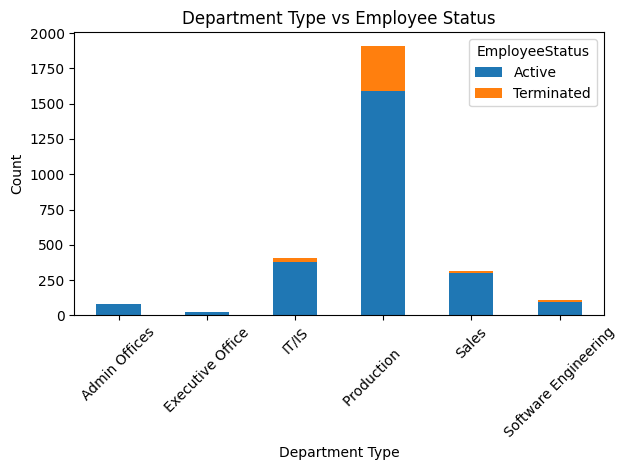

In [45]:


# Training Outcome vs Employee Status
plt.figure(figsize=(10, 6))
training_status_counts = pd.crosstab(hr_df['Training Outcome'], hr_df['EmployeeStatus'])
training_status_counts.plot(kind='bar', stacked=True)
plt.title('Training Outcome vs Employee Status')
plt.xlabel('Training Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Engagement, Satisfaction, and Work-Life Balance by Employee Status
plt.figure(figsize=(12, 6))
scores_by_status = hr_df.groupby('EmployeeStatus')[['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']].mean()
scores_by_status.plot(kind='bar')
plt.title('Average Scores by Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Department Type vs Employee Status
plt.figure(figsize=(12, 6))
dept_status = pd.crosstab(hr_df['DepartmentType'], hr_df['EmployeeStatus'])
dept_status.plot(kind='bar', stacked=True)
plt.title('Department Type vs Employee Status')
plt.xlabel('Department Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()